Suppose you are running two online ads and you wish to compare their performance.  Ad \#1 ran 500 times and people clicked on it 5 times; ad \#2 ran 600 times and people clicked on it 12 times.  The Click-Through-Rate (CTR) of Ad \#2 is 2%, but the CTR for Ad \#1 is only 1%, so you should stick with Ad \#2, right?

Well, not so fast.  Maybe you just haven't collected enough data yet, and the difference in CTR is not significant.  To think about this more carefully, you might imagine that there is some secret, true CTR for each ad; the data lets you make guesses about this underlying rate.

In particular, if you specify the counts (5 of 500, and 12 of 600), you can plot the likelihood of the true CTR for each ad.  If the graphs significantly overlap (which they do), then you do not yet have enough data to feel confident that Ad \#2 is actually better than Ad \#1.  If the two peaks are distinct, then you can confidently distinguish the CTRs.

To see these curves with your own CTRs, fill in the boxes below.  You'll be prompted for all the fields.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import beta
import seaborn as sns
import sys
import argparse

def plot_two_betas(a1=None,b1=None,label1=None,a2=None,b2=None,label2=None,num=10000,threshold=.001):
    x=np.linspace(1./float(num+1),1.0-1./float(num+1),num=num)
    y1=beta.pdf(x,a1,b1)
    big1=y1>=threshold
    plt.plot(100.0*x[big1],y1[big1],label=label1)
    if not (a2 is None):
        y2=beta.pdf(x,a2,b2)
        big2=y2>=threshold
        plt.plot(100.0*x[big2],y2[big2],label=label2)
    if not(label1 is None) or not(label2 is None):
        plt.legend(loc='best')
    plt.xlabel('Rate (in %)')
    plt.ylabel('Likelihood')

def plot_two_samples(a1=None,n1=None,label1='',a2=None,n2=None,label2='',num=10000,threshold=.001):
    # In case a1, etc are passed as strings instead of floats
    a1=float(a1)
    n1=float(n1)

    b1=n1-a1
    if a1<0 or n1<a1:
        print "Must have 0<=a1<=n1"
        sys.exit(0)

    label1_extra='%d of %d (%.2f%%)'%(int(a1),int(n1),100.0*a1/n1)
    if label1 is '':
        label1=label1_extra
    else:
        label1+=' (%s)'%label1_extra



    # Must have a2 and n2 BOTH none or NEITHER none:
    if (a2 is np.nan) or (n2 is np.nan):
        if not ((a2 is np.nan) and (n2 is np.nan)):
            print "Need to set a2 AND n2, if using them."
            sys.exit(0)
    else:
        a2=float(a2)
        n2=float(n2)
        if a2<0 or n2<a2:
            print "Must have 0<=a2<=n2"
            sys.exit(0)
        b2=n2-a2

        label2_extra='%d of %d (%.2f%%)'%(int(a2),int(n2),100.0*a2/n2)
        if label2 is '':
            label2=label2_extra
        else:
            label2+=' (%s)'%label2_extra

    # Add uniform prior:
    a1+=1
    b1+=1
    a2+=1
    b2+=1

    plot_two_betas(a1=a1,b1=b1,a2=a2,b2=b2,label1=label1,label2=label2,threshold=threshold)



//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Clicks from Ad #1 (e.g. 5):  5
Total impressions from Ad #1 (e.g. 500):  500
Name for Ad #1:  Ad #1
Clicks from Ad #2 (e.g. 12):  12
Total impressions from Ad #2 (e.g. 600):  600
Name for Ad #2:  Ad #2


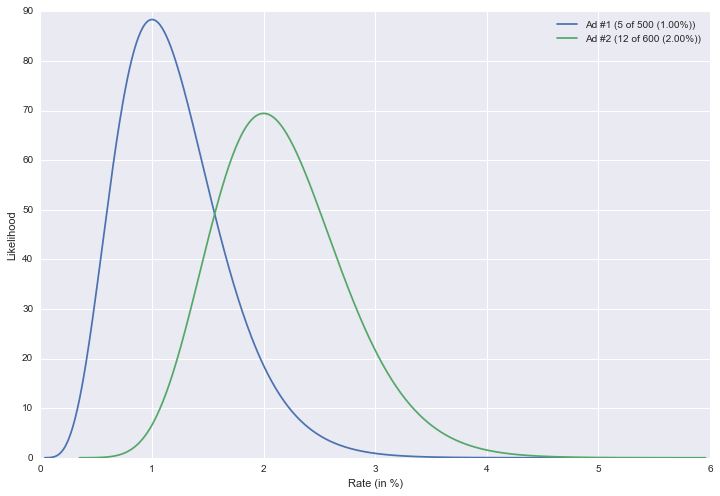

In [3]:
a1=raw_input("Clicks from Ad #1 (e.g. 5):  ")
n1=raw_input("Total impressions from Ad #1 (e.g. 500):  ")
label1=raw_input("Name for Ad #1:  ")

a2=raw_input("Clicks from Ad #2 (e.g. 12):  ")
n2=raw_input("Total impressions from Ad #2 (e.g. 600):  ")
label2=raw_input("Name for Ad #2:  ")

plt.figure(figsize=(12,8))
plot_two_samples(a1=a1,n1=n1,label1=label1,a2=a2,n2=n2,label2=label2)